# CSE 572: Lab 6

In this lab, you will practice implementing different variations of the Support Vector Machine (SVM) classifier.

To execute and make changes to this notebook, click File > Save a copy to save your own version in your Google Drive or Github. Read the step-by-step instructions below carefully. To execute the code, click on each cell below and press the SHIFT-ENTER keys simultaneously or by clicking the Play button. 

When you finish executing all code/exercises, save your notebook then download a copy (.ipynb file). Submit the following **three** things:
1. a link to your Colab notebook,
2. the .ipynb file, and
3. a pdf of the executed notebook on Canvas.

To generate a pdf of the notebook, click File > Print > Save as PDF.


### Load the iris dataset

Load the dataset. For visualization purposes for the first exercise, we will convert the dataframe to have only two features (petal length and petal width) and two classes (Iris-virginica and Iris-other).

In [107]:
import pandas as pd

data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']

data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [108]:
# Drop the sepal features 
data = data.drop(['sepal length', 'sepal width'], axis=1)

data.head()

,petal length,petal width,class
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa


In [109]:
# Replace the Iris-setosa and Iris-versicolor classes with Iris-other
data['class'] = data['class'].replace('Iris-versicolor', 'Iris-other')
data['class'] = data['class'].replace('Iris-setosa', 'Iris-other')

Next, we will split our dataset into three subsets: training (60%), validation (20%), and test (20%).

In [110]:
import numpy as np

# The first parameter is the shuffled data frame
# The second parameter is the split indices which are at 60% of the data and 80% of the data
train, val, test = np.split(data.sample(frac=1, random_state=42), [int(.6*len(data)), int(.8*len(data))])

Print the number of samples in each of the three subsets and the number of instances from each class. For example, for the training set you might print "The training set has __ instances (__ virginica, __ other)".

In [111]:
# YOUR CODE HERE
trainViriginicaCount = train[train['class'] == 'Iris-virginica'].shape[0]
valViriginicaCount = val[val['class'] == 'Iris-virginica'].shape[0]
testViriginicaCount = test[test['class'] == 'Iris-virginica'].shape[0]
print(f"The training set has {train.shape[0]} instances ({trainViriginicaCount} virginica, {train.shape[0] - trainViriginicaCount} other)")
print(f"The validation set has {val.shape[0]} instances ({valViriginicaCount} virginica, {val.shape[0] - valViriginicaCount} other)")
print(f"The test set has {test.shape[0]} instances ({testViriginicaCount} virginica, {test.shape[0] - testViriginicaCount} other)")

The training set has 90 instances (26 virginica, 64 other)
The validation set has 30 instances (12 virginica, 18 other)
The test set has 30 instances (12 virginica, 18 other)


## Support vector machines
Support vector machines (SVMs) are a supervised learning method that finds the hyperplane (or set of hyperplanes) in the $n$-dimensional feature space (where $n$ is the number of input features) which maximizes the distance to the nearest training samples from each class. Maximizing this margin ensures that the decision boundary will be as generalizable as possible to new, unseen data points. 

In [112]:
# import the Support vector classifier
from sklearn.svm import SVC

The main hyperparameter to choose is the regularization parameter $C$, which represents the strength of the penalty incurred during training for allowing samples to be closer to the margin boundary (since a perfect decision boundary is not attainable for most problems). 

SVM also uses a kernel function $K$ to map samples to a higher dimensional space (this is referred to as the "kernel trick"). The SVM implementation in scikit-learn gives four options for the kernel function: linear (this is the standard SVM without non-linear kernel), polynomial, radial basis function (RBF), and sigmoid. 

The below example uses a linear kernel with $C=0.1$.

In [113]:
C = 0.1
linear_svc = SVC(kernel='linear', C=C)

In [114]:
# train the SVM classifier
linear_svc.fit(train[['petal length','petal width']], train['class'])

SVC(C=0.1, kernel='linear')

The following function for plotting the decision boundary is from the [Python Data Science Handbook by Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html).  The function plots the decision boundary as a gray solid line and the margins as gray dashed lines. The support vectors are circled.

In [115]:
import matplotlib.pyplot as plt

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none', edgecolors='gray');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Plot the dataset and the learned decision boundary.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


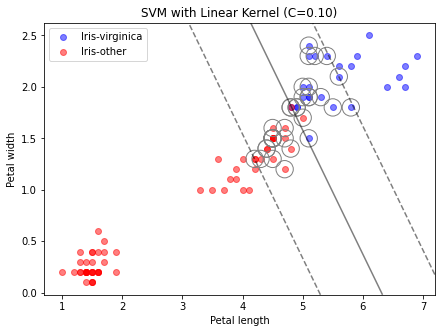

In [116]:
fig, ax = plt.subplots(1, figsize=(7,5))
# Plot the setosa instances
ax.scatter(train[train['class'] == 'Iris-virginica']['petal length'], 
               train[train['class'] == 'Iris-virginica']['petal width'],
               label='Iris-virginica',
               color='blue',
               alpha=0.5)
# Plot the other instances
ax.scatter(train[train['class'] == 'Iris-other']['petal length'], 
               train[train['class'] == 'Iris-other']['petal width'],
               label='Iris-other',
               color='red',
               alpha=0.5)

plot_svc_decision_function(linear_svc, ax=ax)
ax.set_xlabel('Petal length')
ax.set_ylabel('Petal width')
ax.legend()
ax.set_title('SVM with Linear Kernel (C=%0.2f)' % C);

Train a new model with $C=100$ and plot the resulting decision boundary.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


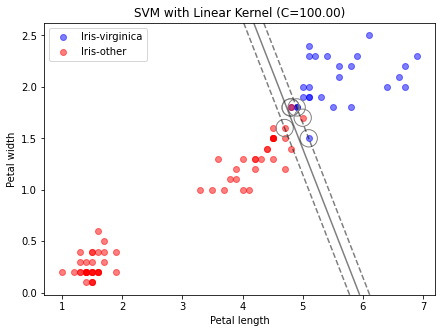

In [117]:
# YOUR CODE HERE
linear_svc_100 = SVC(kernel='linear', C=100)
linear_svc_100.fit(train[['petal length','petal width']], train['class'])

fig, ax = plt.subplots(1, figsize=(7,5))
# Plot the setosa instances
ax.scatter(train[train['class'] == 'Iris-virginica']['petal length'], 
               train[train['class'] == 'Iris-virginica']['petal width'],
               label='Iris-virginica',
               color='blue',
               alpha=0.5)
# Plot the other instances
ax.scatter(train[train['class'] == 'Iris-other']['petal length'], 
               train[train['class'] == 'Iris-other']['petal width'],
               label='Iris-other',
               color='red',
               alpha=0.5)


plot_svc_decision_function(linear_svc_100, ax=ax)
ax.set_xlabel('Petal length')
ax.set_ylabel('Petal width')
ax.legend()
ax.set_title('SVM with Linear Kernel (C=100.00)');

**Question 1:** 

How did a higher value of $C$ affect the decision boundary? Why?

**Answer:** 

A higher value of C led to a **smaller marigin**. This is because, by setting a strong penalty, we're **discouraging the model to allow samples to be closer to the marigin boundary**.

Compute and print the accuracy of each classifier (with $C=0.1$ and $C=100$) on the validation set. 

In [118]:
from sklearn.metrics import accuracy_score
# YOUR CODE HERE

y_valPred = linear_svc.predict(val[['petal length','petal width']])
print('Accuracy for classifier with C=0.1: %.3f' % round(accuracy_score(val['class'], y_valPred), 3))

y_valPred100 = linear_svc_100.predict(val[['petal length','petal width']])
print('Accuracy for classifier with C=100: %.3f' % round(accuracy_score(val['class'], y_valPred100), 3))

Accuracy for classifier with C=0.1: 0.900
Accuracy for classifier with C=100: 0.967


**Question 2:** 

Which value of $C$ resulted in higher validation accuracy?

**Answer:** Clasifier with $C$ = 100 resulted in higher accuracy.


In addition to linear SVM, we can also implement SVM with polynomial, radial basis function (RBF), and sigmoid kernels. Train an SVM classifier with each kernel separately. Set $C$ to be the value of $C$ with highest validation accuracy from Question 2. 

You may need to consult the [sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html). The polynomial kernel requires the `degree` parameter to be passed; use `degree=3`.

In [119]:
# RBF
# YOUR CODE HERE
rbf_svc = SVC(kernel='rbf', C=100)
rbf_svc.fit(train[['petal length','petal width']], train['class'])

SVC(C=100)

In [120]:
# Polynomial (degree=3)
# YOUR CODE HERE
poly_svc = SVC(kernel='poly', C=100, degree=3)
poly_svc.fit(train[['petal length','petal width']], train['class'])

SVC(C=100, kernel='poly')

In [121]:
# Sigmoid
# YOUR CODE HERE
sigmoid_svc = SVC(kernel='sigmoid', C=100)
sigmoid_svc.fit(train[['petal length','petal width']], train['class'])

SVC(C=100, kernel='sigmoid')

Compute and print the validation accuracy for each of the 3 classifiers.

In [122]:
# YOUR CODE HERE
rbf_yValPred = rbf_svc.predict(val[['petal length','petal width']])
print('Accuracy for RBF: %.3f' % accuracy_score(val['class'], rbf_yValPred))

poly_yValPred = poly_svc.predict(val[['petal length','petal width']])
print('Accuracy for Poly: %.3f' % accuracy_score(val['class'], poly_yValPred))

sigmoid_yValPred = sigmoid_svc.predict(val[['petal length','petal width']])
print('Accuracy for Sigmoid: %.3f' % accuracy_score(val['class'], sigmoid_yValPred))

Accuracy for RBF: 0.967
Accuracy for Poly: 0.967
Accuracy for Sigmoid: 0.433


**Question 3:** 

Which of the four kernels (the three above + linear) gave the highest validation accuracy? (If multiple tied for the highest accuracy, list all of them.)

**Answer:** 

Linear, RBF and Poly gave the highest accuracy of 96.7%. 

### SVM with non-linear decision boundary

For the Iris-virginica vs. Iris-other version of the Iris dataset, the two classes were mostly linearly separable with a small number of classification errors. However, if we instead wanted to classify Iris-versicolor vs. Iris-other, the two classes would not be linearly separable. Below, we load the dataset again and convert it to Iris-versicolor vs. Iris-other and plot the dataset as a scatter plot.

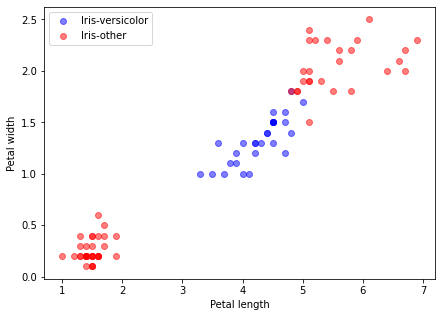

In [123]:
# Load the dataset
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']

# Drop the sepal features
data = data.drop(['sepal length', 'sepal width'], axis=1)

# Replace the Iris-virginica and Iris-setosa classes with Iris-other
data['class'] = data['class'].replace('Iris-virginica', 'Iris-other')
data['class'] = data['class'].replace('Iris-setosa', 'Iris-other')

# Split the data into train/val/test
train, val, test = np.split(data.sample(frac=1, random_state=42), [int(.6*len(data)), int(.8*len(data))])

# Plot the dataset
fig, ax = plt.subplots(1, figsize=(7,5))
# Plot the versicolor instances
ax.scatter(train[train['class'] == 'Iris-versicolor']['petal length'], 
               train[train['class'] == 'Iris-versicolor']['petal width'],
               label='Iris-versicolor',
               color='blue',
               alpha=0.5)

# Plot the other instances
ax.scatter(train[train['class'] == 'Iris-other']['petal length'], 
               train[train['class'] == 'Iris-other']['petal width'],
               label='Iris-other',
               color='red',
               alpha=0.5)

ax.set_xlabel('Petal length')
ax.set_ylabel('Petal width')
ax.legend()

If we train a linear SVM to classify these instances, the accuracy will be low. Train a linear SVM and plot the decision boundary to show this (use $C=100$).

In [124]:
# YOUR CODE HERE
linear_svc = SVC(kernel='linear', C=100)
linear_svc.fit(train[['petal length','petal width']], train['class'])

SVC(C=100, kernel='linear')

The radial basis function kernel will allow us to learn an elliptical decision boundary that will better fit the data. Train an SVM with RBF kernel and plot the decision boundary (use $C=100$).

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


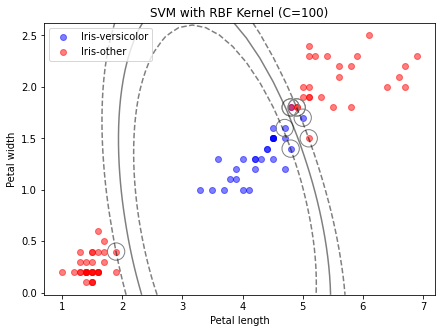

In [125]:
# YOUR CODE HERE
rbf_svc = SVC(kernel='rbf', C=100)
rbf_svc.fit(train[['petal length','petal width']], train['class'])

# Plot the dataset
fig, ax = plt.subplots(1, figsize=(7,5))
# Plot the versicolor instances
ax.scatter(train[train['class'] == 'Iris-versicolor']['petal length'], 
               train[train['class'] == 'Iris-versicolor']['petal width'],
               label='Iris-versicolor',
               color='blue',
               alpha=0.5)

# Plot the other instances
ax.scatter(train[train['class'] == 'Iris-other']['petal length'], 
               train[train['class'] == 'Iris-other']['petal width'],
               label='Iris-other',
               color='red',
               alpha=0.5)

plot_svc_decision_function(rbf_svc, ax=ax)

ax.set_xlabel('Petal length')
ax.set_ylabel('Petal width')
ax.legend()
ax.set_title('SVM with RBF Kernel (C=100)');

Compute and print the validation accuracy of your linear and RBF SVM classifiers.

In [126]:
# YOUR CODE HERE
linear_yValPred = linear_svc.predict(val[['petal length','petal width']])
print('Accuracy for linear SVM: %.3f' % accuracy_score(val['class'], linear_yValPred))

rbf_yValPred = rbf_svc.predict(val[['petal length','petal width']])
print('Accuracy for RBF SVM: %.3f' % accuracy_score(val['class'], rbf_yValPred))

Accuracy for linear SVM: 0.700
Accuracy for RBF SVM: 0.967


Finally, use the best model (the one with the highest validation accuracy in the last cell) to compute the final accuracy on our test set. 

In [127]:
# YOUR CODE HERE
rbf_yTestPred = rbf_svc.predict(test[['petal length','petal width']])
print('Accuracy for RBF SVM (Test set): %.3f' % accuracy_score(test['class'], rbf_yTestPred))

Accuracy for RBF SVM (Test set): 0.967


### Put everything together

In this last section, we load the full iris dataset including all features and the three classes and split it into train/val/test subsets. Then you will implement the following steps:
1. Train an SVM with RBF kernel using all four input features and all 3 classes.
2. Evaluate whether $C=0.1$, $C=1$, $C=10$, or $C=100$ gives better validation accuracy. Print the validation accuracy for both.
3. Use the model with the setting of $C$ that gave the highest validation accuracy to make predictions for the *test* set and compute/print the final accuracy on the test set.

In [128]:
# Load the dataset
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']

# Split the data into train/val/test
train, val, test = np.split(data.sample(frac=1, random_state=42), [int(.6*len(data)), int(.8*len(data))])
train.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'class'], dtype='object')

In [129]:
# Train SVMs and evaluate validation accuracy
# YOUR CODE HERE

C = 0.1
while C <= 100:
  svm = SVC(kernel='rbf', C=C)
  svm.fit(train.drop(['class'], axis=1), train['class'])
  pred = svm.predict(val.drop(['class'], axis = 1))
  acc = accuracy_score(val['class'], pred)
  print(f'Validation accuracy for RBF SVM with C={C} is {round(acc, 3)}')
  C *= 10

Validation accuracy for RBF SVM with C=0.1 is 0.733
Validation accuracy for RBF SVM with C=1.0 is 0.933
Validation accuracy for RBF SVM with C=10.0 is 0.967
Validation accuracy for RBF SVM with C=100.0 is 0.933


In [130]:
# Use best model to predict test set and compute test accuracy
# YOUR CODE HERE
svm = SVC(kernel='rbf', C=10)
svm.fit(train.drop(['class'], axis=1), train['class'])

pred = svm.predict(test.drop(['class'], axis = 1))
acc = accuracy_score(test['class'], pred)
print(f'Test accuracy for RBF SVM with C=10 is {round(acc, 3)}')

Test accuracy for RBF SVM with C=10 is 0.967
